# Matplotlib
[matplotlib官网](https://matplotlib.org/stable/users/index.html)
[Example of matplotlib](https://matplotlib.org/stable/gallery/index.html)


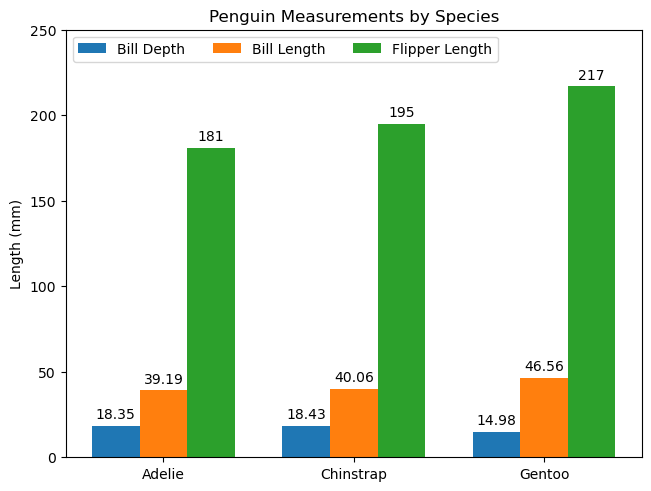

In [9]:
# grouped bar chart with labels
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_counts = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (39.19, 40.06, 46.56),
    'Flipper Length': (181.0, 195.0, 217.0),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin Measurements by Species')
ax.set_xticks(x + width, species)
# ax.legend(title='Attributes', loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(loc='upper left', ncols = 3)

ax.set_ylim(0, 250)  # set y-axis limit
plt.show()


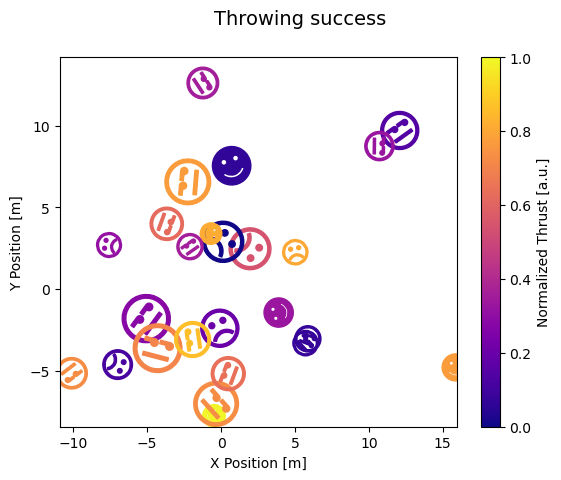

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

SUCCESS_SYMBOL = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "☻"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(size = N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size = 14)
for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOL[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))
fig.colorbar(
    plt.cm.ScalarMappable(norm=Normalize(0,1), cmap=cmap),
    ax = ax,
    label="Normalized Thrust [a.u.]"
)

ax.set_xlabel("X Position [m]")
ax.set_ylabel("Y Position [m]")

plt.show()

d:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from font(s) DejaVu San

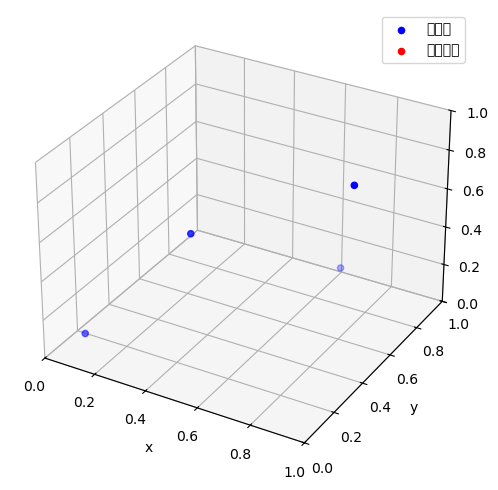

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# 原始点集，取几个代表点
points = np.array([
    [0.1, 0.1, 0.1],
    [0.4, 0.3, 0.6],
    [0.7, 0.8, 0.2],
    [0.9, 0.5, 0.9],
])

# 定义4个群操作函数
def E(x, y, z):
    return x, y, z

def T(x, y, z):
    return x, (y + 0.5) % 1, (z + 0.5) % 1

def sigma_c(x, y, z):
    return (-x) % 1, (y + 0.5) % 1, (-z + 0.5) % 1

def I(x, y, z):
    return (-x) % 1, y % 1, (-z) % 1

operations = [E, T, sigma_c, I]
op_names = ['恒等操作 E', '平移操作 T', '滑移镜面 σ_c', '中心反演 I']

# 准备绘图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
scat = ax.scatter(points[:,0], points[:,1], points[:,2], c='blue', label='原始点')
trans_scat = ax.scatter([], [], [], c='red', label='变换后点')

title = ax.set_title('')

ax.legend(loc='upper right')

def update(frame):
    ax.collections.clear()
    # 画原始点
    ax.scatter(points[:,0], points[:,1], points[:,2], c='blue', label='原始点')
    # 计算变换后点
    func = operations[frame]
    new_points = np.array([func(x,y,z) for x,y,z in points])
    # 画变换后点
    ax.scatter(new_points[:,0], new_points[:,1], new_points[:,2], c='red', label='变换后点')
    title.set_text(f'群操作: {op_names[frame]}')
    return scat, title

ani = FuncAnimation(fig, update, frames=len(operations), interval=2000, repeat=True)

plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 初始化图形
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("4次旋转对称操作演示")

# 绘制初始正方形
square = plt.Rectangle((-0.5, -0.5), 1, 1, fc='red', alpha=0.7)
ax.add_patch(square)

# 动画函数
def animate(frame):
    ax.clear()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid(False)
    ax.set_title(f"Rotation Angle: {frame * 90 / 10}°")  # 动态显示角度
    
    # 旋转并绘制正方形
    angle = np.radians(frame * 9)  # 每帧旋转9°
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    corners = np.array([[-0.5, -0.5], [0.5, -0.5], [0.5, 0.5], [-0.5, 0.5]])
    rotated_corners = np.dot(corners, rotation_matrix)
    rotated_square = plt.Polygon(rotated_corners, fc='red', alpha=0.7)
    ax.add_patch(rotated_square)
    
    # 标注旋转轴
    ax.plot(0, 0, 'bo', markersize=10, label='Rotation Axis')
    ax.legend(frameon=False)
    ax.axis('off')  # 关闭坐标轴显示

# 生成动画
ani = FuncAnimation(fig, animate, frames=10, interval=300)
ani.save('rotation_animation.gif', writer='ffmpeg', fps=10)
plt.show()  # 在Notebook中使用 %matplotlib notebook 可交互

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# 原始点集，取几个代表点
points = np.array([
    [0.1, 0.1, 0.1],
    [0.4, 0.3, 0.6],
    [0.7, 0.8, 0.2],
    [0.9, 0.5, 0.9],
])

# 定义4个群操作函数
def E(x, y, z):
    return x, y, z

def T(x, y, z):
    return x, (y + 0.5) % 1, (z + 0.5) % 1

def sigma_c(x, y, z):
    return (-x) % 1, (y + 0.5) % 1, (-z + 0.5) % 1

def I(x, y, z):
    return (-x) % 1, y % 1, (-z) % 1

operations = [E, T, sigma_c, I]
op_names = ['恒等操作 E', '平移操作 T', '滑移镜面 σ_c', '中心反演 I']

# 准备绘图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
scat = ax.scatter(points[:,0], points[:,1], points[:,2], c='blue', label='原始点')
trans_scat = ax.scatter([], [], [], c='red', label='变换后点')

title = ax.set_title('')

ax.legend(loc='upper right')

def update(frame):
    # ax.collections.clear()
    # 画原始点
    ax.scatter(points[:,0], points[:,1], points[:,2], c='blue', label='原始点')
    # 计算变换后点
    func = operations[frame]
    new_points = np.array([func(x,y,z) for x,y,z in points])
    # 画变换后点
    ax.scatter(new_points[:,0], new_points[:,1], new_points[:,2], c='red', label='变换后点')
    title.set_text(f'群操作: {op_names[frame]}')
    return scat, title

ani = FuncAnimation(fig, update, frames=len(operations), interval=2000, repeat=True)

ani.save('group_operations_animation.gif', writer='ffmpeg', fps=2)
plt.show()


<IPython.core.display.Javascript object>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ase.visualize.plot import plot_atoms
from ase import Atoms

# 原始晶胞：4 个原子（Si4）
atoms = Atoms('Si4',
              positions=[(0.1, 0.1, 0.1),
                         (0.6, 0.1, 0.1),
                         (0.1, 0.6, 0.1),
                         (0.1, 0.1, 0.6)],
              cell=[1.0, 1.0, 1.0],
              pbc=True)

def symmetry_operations(pos):
    """生成对称操作后的原子位置（形状保持 (4, 3)）"""
    ops = []
    n_atoms = pos.shape[0]  # 原子数（此处为4）
    
    # g1: 恒等变换（直接返回原始坐标）
    ops.append(pos.copy())
    
    # g2: 2₁-screw axis along c: (-x, -y, z + 0.5)
    # 对每个原子的 x, y, z 分别计算，保持形状 (4, 3)
    g2_x = -pos[:, 0].reshape(-1, 1)  # 转换为 (4, 1) 数组（每行一个原子的 x 坐标）
    g2_y = -pos[:, 1].reshape(-1, 1)
    g2_z = pos[:, 2].reshape(-1, 1) + 0.5
    g2_pos = np.hstack((g2_x, g2_y, g2_z))  # 水平堆叠为 (4, 3)
    ops.append(g2_pos)
    
    # g3: 滑移面 a: (-x + 0.5, y + 0.5, -z)
    g3_x = -pos[:, 0].reshape(-1, 1) + 0.5
    g3_y = pos[:, 1].reshape(-1, 1) + 0.5
    g3_z = -pos[:, 2].reshape(-1, 1)
    g3_pos = np.hstack((g3_x, g3_y, g3_z))
    ops.append(g3_pos)
    
    # g4: 滑移面 c: (x + 0.5, -y + 0.5, -z + 0.5)
    g4_x = pos[:, 0].reshape(-1, 1) + 0.5
    g4_y = -pos[:, 1].reshape(-1, 1) + 0.5
    g4_z = -pos[:, 2].reshape(-1, 1) + 0.5
    g4_pos = np.hstack((g4_x, g4_y, g4_z))
    ops.append(g4_pos)
    
    return ops

# 获取所有对称操作后的位置（形状为 (4, 4, 3)）
all_positions = symmetry_operations(atoms.get_positions())

# 创建动画
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Pca2₁ Symmetry Operations")

def update(frame):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Operation g{frame+1}")
    # 设置当前帧的原子位置（从 all_positions[frame] 中提取 (4, 3) 的坐标）
    atoms.set_positions(all_positions[frame])
    # 绘制原子（确保 show_unit_cell 正确显示晶胞）
    plot_atoms(atoms, ax, radii=0.2, rotation=('90x,90z'), show_unit_cell=1)

# 生成动画（4 帧对应 4 种对称操作）
ani = FuncAnimation(fig, update, frames=4, interval=1500, repeat=True)
# 保存为 GIF（需要 ffmpeg 支持）
ani.save('pca21_symmetry_operations.gif', writer='ffmpeg', fps=2)
plt.show()

<IPython.core.display.Javascript object>

In [21]:
import numpy as np
from ase.io import read
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from io import StringIO

# 手动贴入POSCAR内容
poscar = """Autosave\of\hfo2-o-fe                   
   1.00000000000000     
     5.0993155677255730    0.0000000000000000    0.0000000000000000
     0.0000000000000000    5.1281015895346158    0.0000000000000000
     0.0000000000000000    0.0000000000000000    5.3227449534854081
   Zr   O 
     4     8
Direct
  0.9980427369364980  0.9979422256491253  0.9970654796086135
  0.9980427369364980  0.4979422256491253  0.4358845103913839
  0.4662572700635003  0.9979422256491253  0.4970654796086134
  0.4662572700635003  0.4979422256491253  0.9358845403913864
  0.6665556996704273  0.6426070593932984  0.6019439990949821
  0.7977442773295759  0.6426070593932984  0.1019439840949847
  0.6665556996704273  0.1426070743932960  0.8309960079050170
  0.7977442773295759  0.1426070743932960  0.3310060209050176
  0.1972277981810986  0.7462207249575827  0.7398458914770334
  0.2670721938189023  0.7462107109575855  0.2398459054770348
  0.1972277981810986  0.2462106959575880  0.6930941155229657
  0.2670721938189023  0.2462106959575880  0.1930940855229630
"""
structure = read(StringIO(poscar), format='vasp')
positions = structure.get_scaled_positions()

def pca21_symmetry_ops(frac_pos):
    ops = []
    ops.append(frac_pos)
    op2 = np.copy(frac_pos)
    op2[:, 0] = -op2[:, 0] % 1.0
    op2[:, 1] = -op2[:, 1] % 1.0
    op2[:, 2] = (op2[:, 2] + 0.5) % 1.0
    ops.append(op2)
    op3 = np.copy(frac_pos)
    op3[:, 0] = (-op3[:, 0] + 0.5) % 1.0
    op3[:, 1] = (op3[:, 1] + 0.5) % 1.0
    op3[:, 2] = (-op3[:, 2]) % 1.0
    ops.append(op3)
    op4 = np.copy(frac_pos)
    op4[:, 0] = (op4[:, 0] + 0.5) % 1.0
    op4[:, 1] = (-op4[:, 1] + 0.5) % 1.0
    op4[:, 2] = (-op4[:, 2] + 0.5) % 1.0
    ops.append(op4)
    return ops

structures = []
for pos in pca21_symmetry_ops(positions):
    s = structure.copy()
    s.set_scaled_positions(pos)
    structures.append(s)

fig, ax = plt.subplots(figsize=(6, 6))
def update(i):
    ax.clear()
    plot_atoms(structures[i], ax, radii=0.3, rotation=('90x,90z'), show_unit_cell=2)
    ax.set_title(f"Pca2₁ Operation g{i+1}")
ani = FuncAnimation(fig, update, frames=4, interval=1500)
ani.save("pca21_symmetry.gif", writer="pillow")


<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\o'
C:\Users\23210\AppData\Local\Temp\ipykernel_29848\1334706134.py:9: SyntaxWarning: invalid escape sequence '\o'
  poscar = """Autosave\of\hfo2-o-fe


<IPython.core.display.Javascript object>

C:\Users\23210\AppData\Local\Temp\ipykernel_29848\1334706134.py:65: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) SimHei.
  ani.save("pca21_symmetry.gif", writer="pillow")
